In [53]:
# importing major libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df = pd.read_csv('Employee_promotion.csv').iloc[:,0:5]

In [5]:
df.head()

,Age,Salary,YearsExperience,NumCertifications,JobSatisfaction
0,18,138268,0,0,4
1,26,119117,5,1,6
2,21,105751,1,2,6
3,19,115759,0,0,6
4,31,120824,2,1,7


In [6]:
df.describe()

,Age,Salary,YearsExperience,NumCertifications,JobSatisfaction
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,25.980833,130716.338333,4.527500,1.204167,5.560833
std,4.886583,31410.401415,3.112713,1.136615,1.609386
min,18.000000,57648.000000,0.000000,0.000000,1.000000
25%,22.000000,107870.750000,2.000000,0.000000,4.000000
50%,26.000000,126604.000000,4.000000,1.000000,6.000000
75%,29.000000,149426.000000,7.000000,2.000000,7.000000
max,43.000000,268467.000000,16.000000,6.000000,10.000000


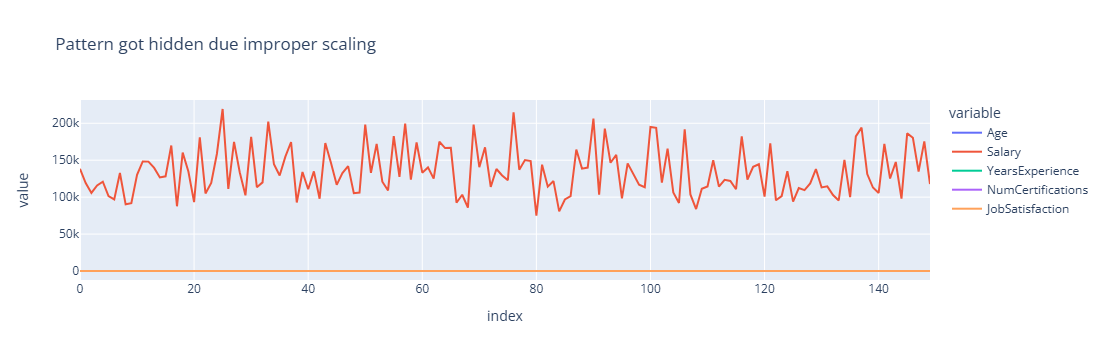

In [57]:
# plt.figure(figsize=(14,6))
# plt.plot(df.index,df.Age)
# plt.plot(df.index,df.Salary)
# plt.plot(df.index,df.YearsExperience)
# plt.plot(df.index,df.NumCertifications)
# plt.show()

px.line(df.head(150),title='Pattern got hidden due improper scaling')

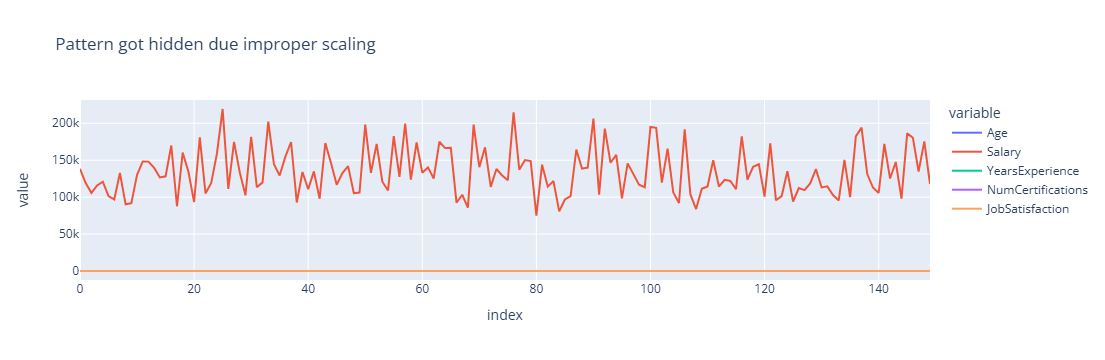

In [11]:
# standardisation 
# classification
from sklearn.model_selection import train_test_split

x = df.iloc[:,0:-1]
y = df.JobSatisfaction

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
print('rows for training',x_train.shape[0])
print('rows for testing',x_test.shape[0])

rows for training 960
rows for testing 240


In [15]:
# standardisation

# algo --> fit (x_train)
# algo --> transform(x_train,y_train)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc

StandardScaler()

In [17]:
sc.fit(x_train)

StandardScaler()

In [29]:
# sc.transform(x_train)

In [27]:
x_train_sc = pd.DataFrame(sc.transform(x_train),columns = sc.get_feature_names_out())

x_train_sc.describe()

,Age,Salary,YearsExperience,NumCertifications
count,9.600000e+02,9.600000e+02,9.600000e+02,9.600000e+02
mean,-5.551115e-17,2.979098e-16,-5.551115e-17,9.621933e-17
std,1.000521e+00,1.000521e+00,1.000521e+00,1.000521e+00
min,-1.619055e+00,-2.300981e+00,-1.455152e+00,-1.070611e+00
25%,-8.091058e-01,-7.303066e-01,-8.146449e-01,-1.070611e+00
50%,8.436974e-04,-1.191046e-01,-1.741379e-01,-1.761057e-01
75%,6.083058e-01,6.008751e-01,7.866227e-01,7.183995e-01
max,3.443129e+00,4.296377e+00,3.668904e+00,4.296420e+00


In [28]:
x_test_sc = pd.DataFrame(sc.transform(x_test),columns = sc.get_feature_names_out())

x_test_sc.describe()

,Age,Salary,YearsExperience,NumCertifications
count,240.000000,240.000000,240.000000,240.000000
mean,-0.015187,-0.071922,-0.026021,0.032612
std,0.945903,0.909002,0.983857,1.080824
min,-1.619055,-1.988260,-1.455152,-1.070611
25%,-0.606618,-0.720465,-0.814645,-1.070611
50%,0.000844,-0.244077,-0.174138,-0.176106
75%,0.608306,0.457377,0.466369,0.718400
max,3.443129,3.303670,3.348651,4.296420


In [23]:
sc.get_feature_names_out()

array(['Age', 'Salary', 'YearsExperience', 'NumCertifications'],
      dtype=object)

In [49]:
# plt.figure(figsize=(14,6))
# plt.plot(x_train_sc.index,x_train_sc.Age)
# plt.plot(x_train_sc.index,x_train_sc.Salary)
# plt.plot(x_train_sc.index,x_train_sc.YearsExperience)
# plt.plot(x_train_sc.index,x_train.NumCertifications)
# plt.show()

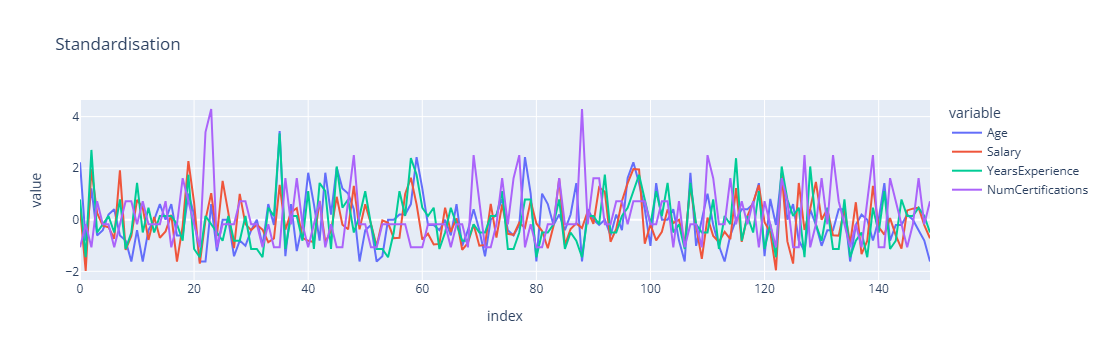

In [60]:
import plotly.express as px 
px.line(x_test_sc.head(150),title='Standardisation')

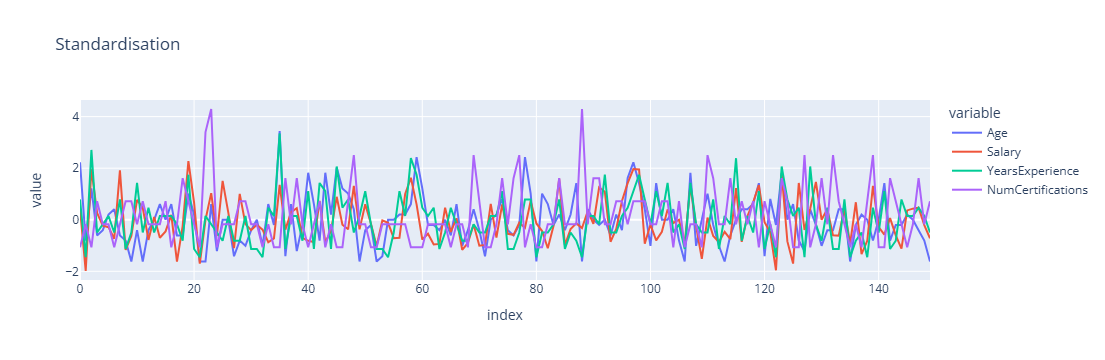

In [30]:
# normalisation
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
norm

MinMaxScaler()

In [31]:
norm.fit(x_train)

MinMaxScaler()

In [38]:
x_train_norm = pd.DataFrame(norm.transform(x_train),columns=norm.get_feature_names_out())
x_train_norm.describe()

,Age,Salary,YearsExperience,NumCertifications
count,960.000000,960.000000,960.000000,960.000000
mean,0.319833,0.348773,0.283984,0.199479
std,0.197646,0.151655,0.195260,0.186420
min,0.000000,0.000000,0.000000,0.000000
25%,0.160000,0.238076,0.125000,0.000000
50%,0.320000,0.330720,0.250000,0.166667
75%,0.440000,0.439851,0.437500,0.333333
max,1.000000,1.000000,1.000000,1.000000


In [39]:
x_test_norm = pd.DataFrame(norm.transform(x_test),columns=norm.get_feature_names_out())
x_test_norm.describe()

,Age,Salary,YearsExperience,NumCertifications
count,240.000000,240.000000,240.000000,240.000000
mean,0.316833,0.337871,0.278906,0.205556
std,0.186857,0.137783,0.192007,0.201382
min,0.000000,0.047401,0.000000,0.000000
25%,0.200000,0.239568,0.125000,0.000000
50%,0.320000,0.311777,0.250000,0.166667
75%,0.440000,0.418100,0.375000,0.333333
max,1.000000,0.849530,0.937500,1.000000


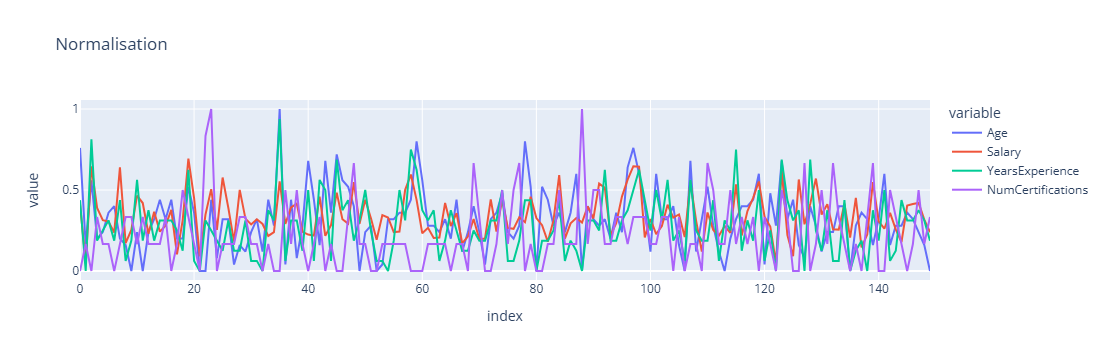

In [61]:
px.line(x_test_norm.head(150),title='Normalisation')

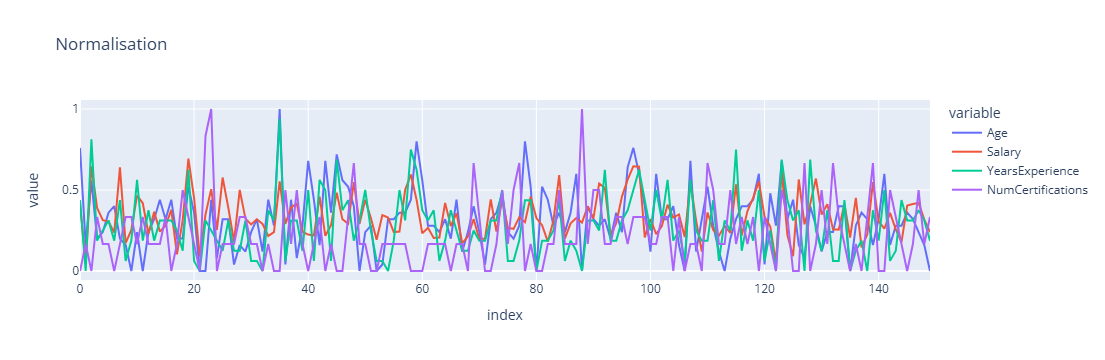